In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import sys
import time
import tweepy
import collections

In [2]:
consumer_key = '7EMmJcbJk7xQ34bVhBJ2XN14h'
consumer_secret = 'E42l0TcUuYQillRykLmHkhUlwXHV1HT8H6NCQQFl0Nh4ipylSQ'
access_token = '1298667663296811014-q6pkU3Ujj6elrq443ev0bS0UWQhtuU'
access_token_secret = 'Ok82EcMSsPWfOtb0iABR2ZP5suG0vimXWmY0CnbIZebxG'

In [3]:
#Authentication 
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#Generating the twitter data using the id
id=25073877
user1 = api.get_user(id)
donald_trump = user1.screen_name
print( donald_trump)

realDonaldTrump


In [6]:
id=939091
user2=api.get_user(id)
DrJillStein=user2.screen_name
print(DrJillStein)

JoeBiden


In [7]:
id=1330457336
user3=api.get_user(id)
billclinton=user3.screen_name
print(billclinton)

BillClinton


In [8]:
id=1176367702543413248
user4=api.get_user(id)
hillaryclinton=user4.screen_name
print(hillaryclinton )

Jorgensen4POTUS


In [9]:
#Generation of the Followers data 
followers_count1 = user1.followers_count
print("Donald Trump:",followers_count1)
followers_count2 = user2.followers_count
print("JoeBiden",followers_count2)
followers_count3 = user3.followers_count
print("Billclinton",followers_count3)
followers_count4 = user4.followers_count
print("Jorgensen4POTUS",followers_count4)

Donald Trump: 86347461
JoeBiden 9710749
Billclinton 12265489
Jorgensen4POTUS 136331


In [10]:
#Generation of Friends data of all the US election candidates.
friends_count1 = user1.friends_count
print("Donald Trump:",friends_count1)
friends_count2 = user2.friends_count
print("Joe Biden",friends_count2)
friends_count3 = user3.friends_count
print("Billclinton",friends_count2)
friends_count4 = user4.friends_count
print("Jorgensen4POTUS",friends_count4)

Donald Trump: 50
Joe Biden 28
Billclinton 28
Jorgensen4POTUS 207


In [11]:
#Appending the friends ids of the candidates to the lists. 
list1=[]
list2=[]
list3=[]
list4=[]
for i in api.friends_ids(25073877):
    list1.append(i)
for i in api.friends_ids(25073877):
    list1.append(i)
for i in api.friends_ids(939091):
    list2.append(i)
for i in api.friends_ids(1330457336):
    list3.append(i)
for i in api.friends_ids(1176367702543413248):
    list4.append(i)    

In [12]:
#Mutual Friends between all the four candidates
list_common0=[]
for i in list1:
    if i in list2 or i in list3 or i in list4:
        list_common0.append(i)
list_common=list(dict.fromkeys(list_common0))
print(list_common)
list5=[]
for i in list_common:
    list5.append(i)

[818910970567344128, 822215673812119553]


In [13]:
#Mutual friends between Joe Biden and Bill Clinton
list_common1=[]
for i in list2:
    if i in list3:
        list_common1.append(i)
print(list_common1)

[30354991, 2293315159, 172858784, 1339835893, 813286]


In [14]:
#Adding nodes and edges to all the lists in order to form a graph for all the candidates,their friends and Mutual friends.
g = nx.gnp_random_graph(100, 0.02)
g=nx.Graph()

#Adding friends to the candidates
for i in api.friends_ids(25073877):
    g.add_node(i)
for i in api.friends_ids(939091):
    list2.append(i)
for i in api.friends_ids(1330457336):
    list3.append(i)
for i in api.friends_ids(1176367702543413248):
    list4.append(i)
for i in list1:
    g.add_edge("Trump",i)
for i in list2:
    g.add_edge("Joe",i)
for i in list3:
    g.add_edge("Clinton",i)
for i in list4:
    g.add_edge("Jorgen",i)

    
#Adding Mutual friends of all the 4 candidates to the graph
for i in list5:
    g.add_node(i)
for i in list5:
    g.add_edge("Trump",i)
for i in list5:
    g.add_edge("Joe",i)
for i in list5:
    g.add_edge("Clinton",i)
for i in list5:
    g.add_edge("Jorgen",i)
    
#Adding Mutual friends of Joe and Clinton to the graph
for i in list_common1:
    g.add_node(i)
for i in list_common1:
    g.add_edge("Joe",i)
for i in list_common1:
    g.add_edge("Clinton",i)

In [15]:
 #Info about nodes and edges in the graph
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 317
Number of edges: 324
Average degree:   2.0442


In [16]:
#Generation of the labels to the graph
screen_names_map = {}
for i in g.nodes():
    try:
        screen_names_map[i] = api.get_user(i).screen_name
    except:
        "Clinton"
        #screen_names_map[i] = api.friends_ids(1330457336)

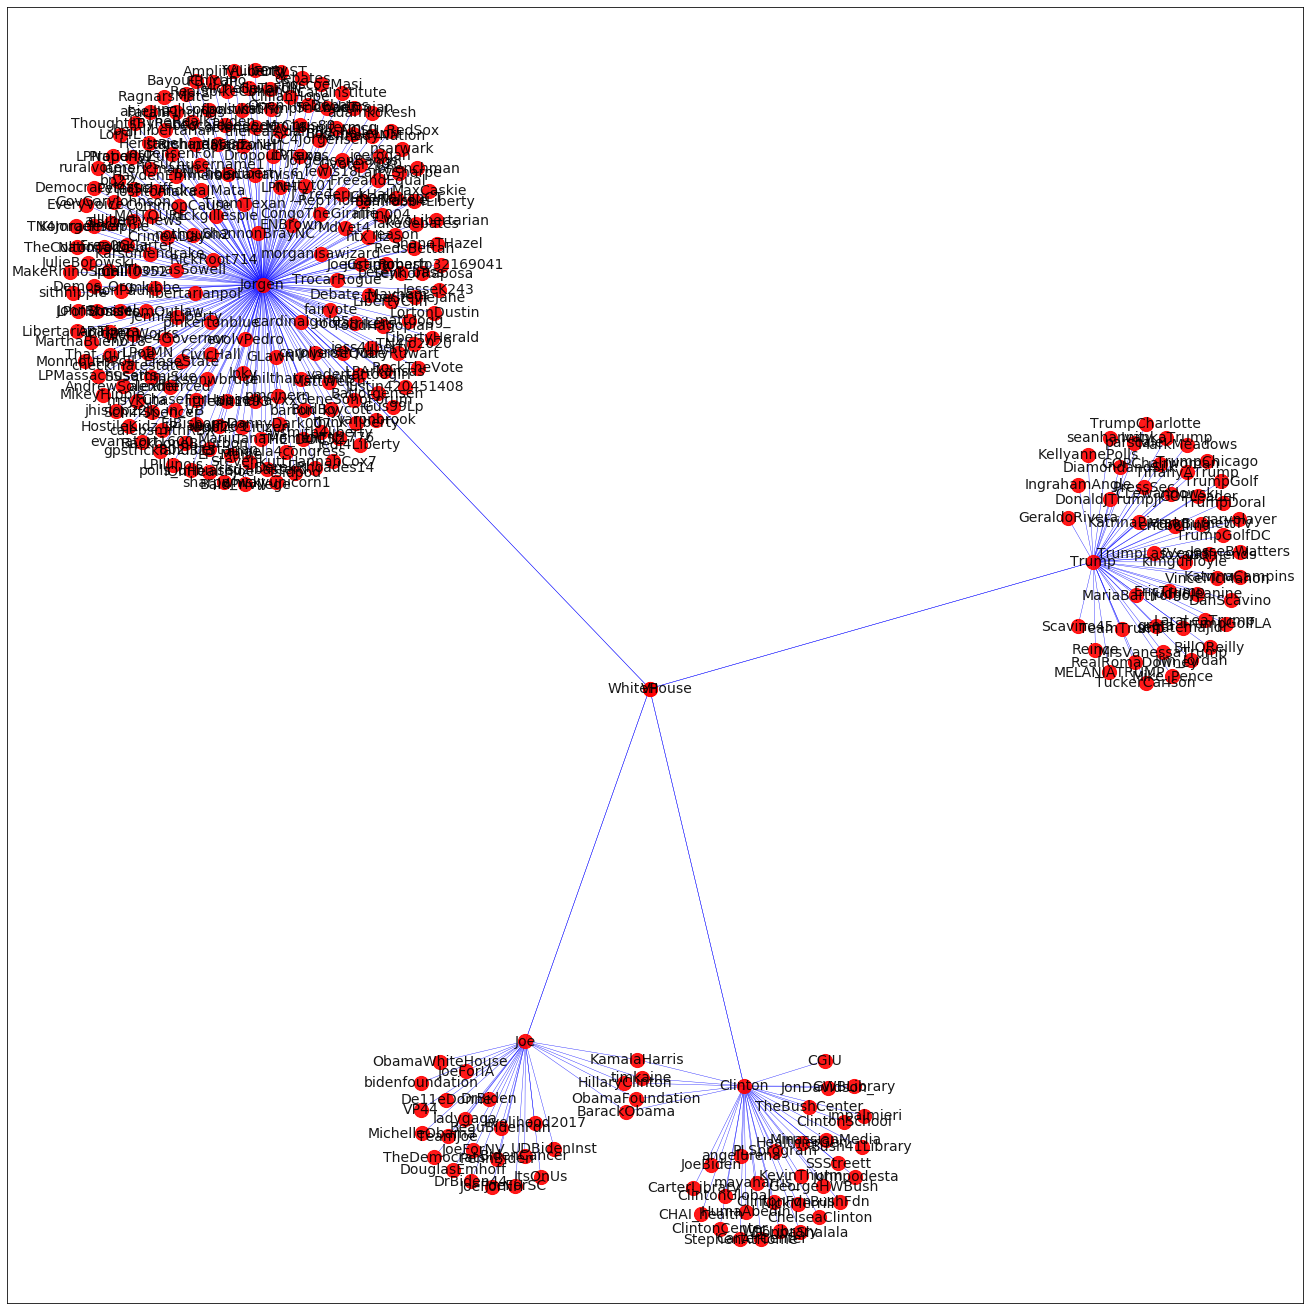

In [17]:
#Plotting the final graph which consists of friends of all the candidates and their mutual friends shown in an Friendship Network.
plt.figure(figsize=(18,18))
relabeled_G = nx.relabel_nodes(g,screen_names_map)

nx.draw(relabeled_G,alpha=0.9, width=0.4,node_size=200,node_color="red",edge_color="blue",font_size=14,with_labels = True)
#nx.draw_networkx(g, with_labels = True) 
plt.axis("on")
plt.show()

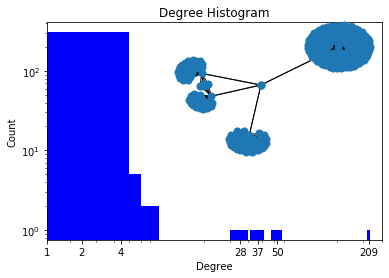

In [18]:
#Construction of a histogram for Degree Distribution 
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=8, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log', basex=8)
plt.yscale('log')
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = g.subgraph(sorted(nx.connected_components(relabeled_G), key=len, reverse=True)[0])
pos = nx.spring_layout(relabeled_G)
plt.axis("off")
nx.draw_networkx_nodes(relabeled_G, pos, node_size=50)
nx.draw_networkx_edges(relabeled_G, pos, alpha=0.9)

plt.show()


(-1.0797353680965027,
 0.6003949657731631,
 -0.665487486043135,
 1.0526025886587653)

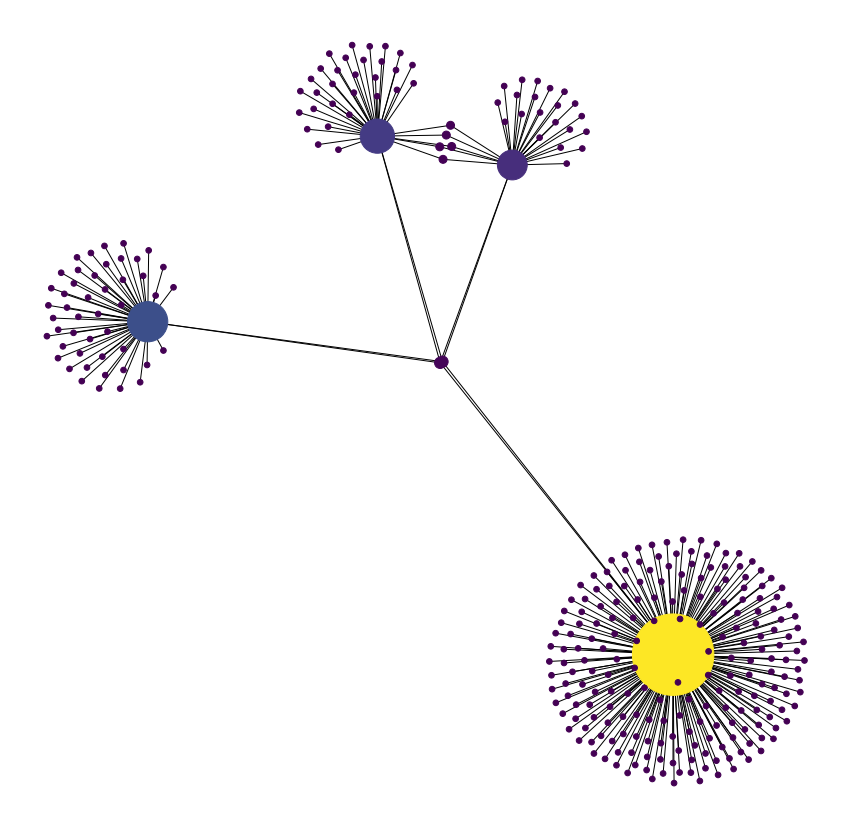

In [19]:
#Degree Centrality for all the 4 candidates
pos = nx.spring_layout(relabeled_G)
degCent = nx.degree_centrality(relabeled_G)
node_color = [20000.0 * relabeled_G.degree(v) for v in relabeled_G]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(relabeled_G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')



In [20]:
#Increasing Order of the Degree Centrality

sorted(degCent, key=degCent.get, reverse=True)[:5]

['Jorgen', 'Trump', 'Clinton', 'Joe', 'VP']

(-0.69895367247663,
 1.1185639884576832,
 -0.9746996461960757,
 0.6911344592078872)

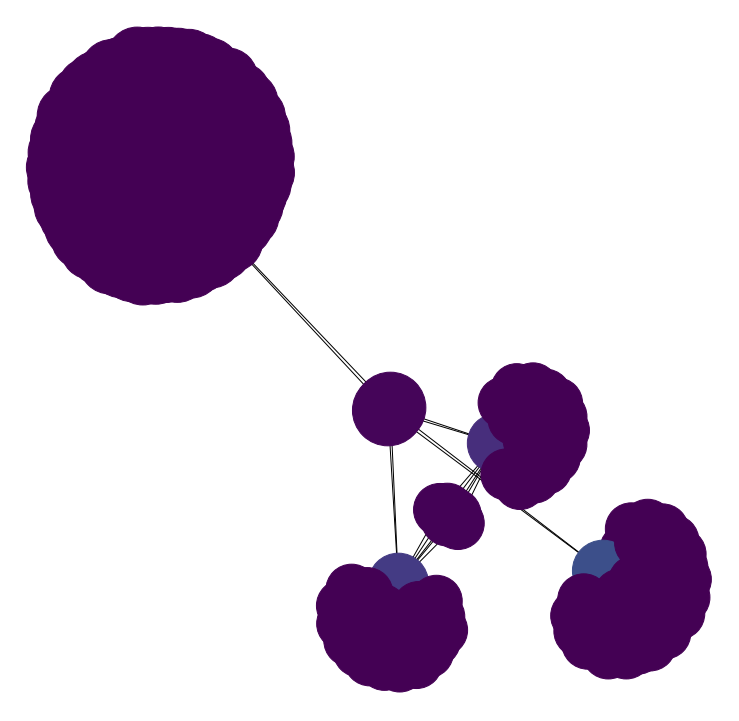

In [21]:
#Closeness Centrality
pos = nx.spring_layout(relabeled_G)
cloCent = nx.closeness_centrality(relabeled_G)
node_color = [20000.0 * relabeled_G.degree(v) for v in relabeled_G]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(relabeled_G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')



In [22]:
#Increasing order of Closeness Centrality
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

['Jorgen', 'VP', 'WhiteHouse', 'OC4Jorgensen', 'littlebit1193']

In [23]:
#What is the shortest path between the Trump and Joe?
sources = ['Trump']
targets = ['Joe'] 
for i in range(1):
    path = nx.shortest_path(relabeled_G,source=sources[i],target=targets[i])
    length = nx.shortest_path_length(relabeled_G,source=sources[i],target=targets[i],method='dijkstra')
    print("Shortest Path between Node ", str(sources[i])," ---> ", str(targets[i]), " is ",
          str(path), " ,Length = ", str(length))

Shortest Path between Node  Trump  --->  Joe  is  ['Trump', 'VP', 'Joe']  ,Length =  2


(-0.6627460939798309, 1.080350534592392, -0.93578938192727, 0.6539827617740963)

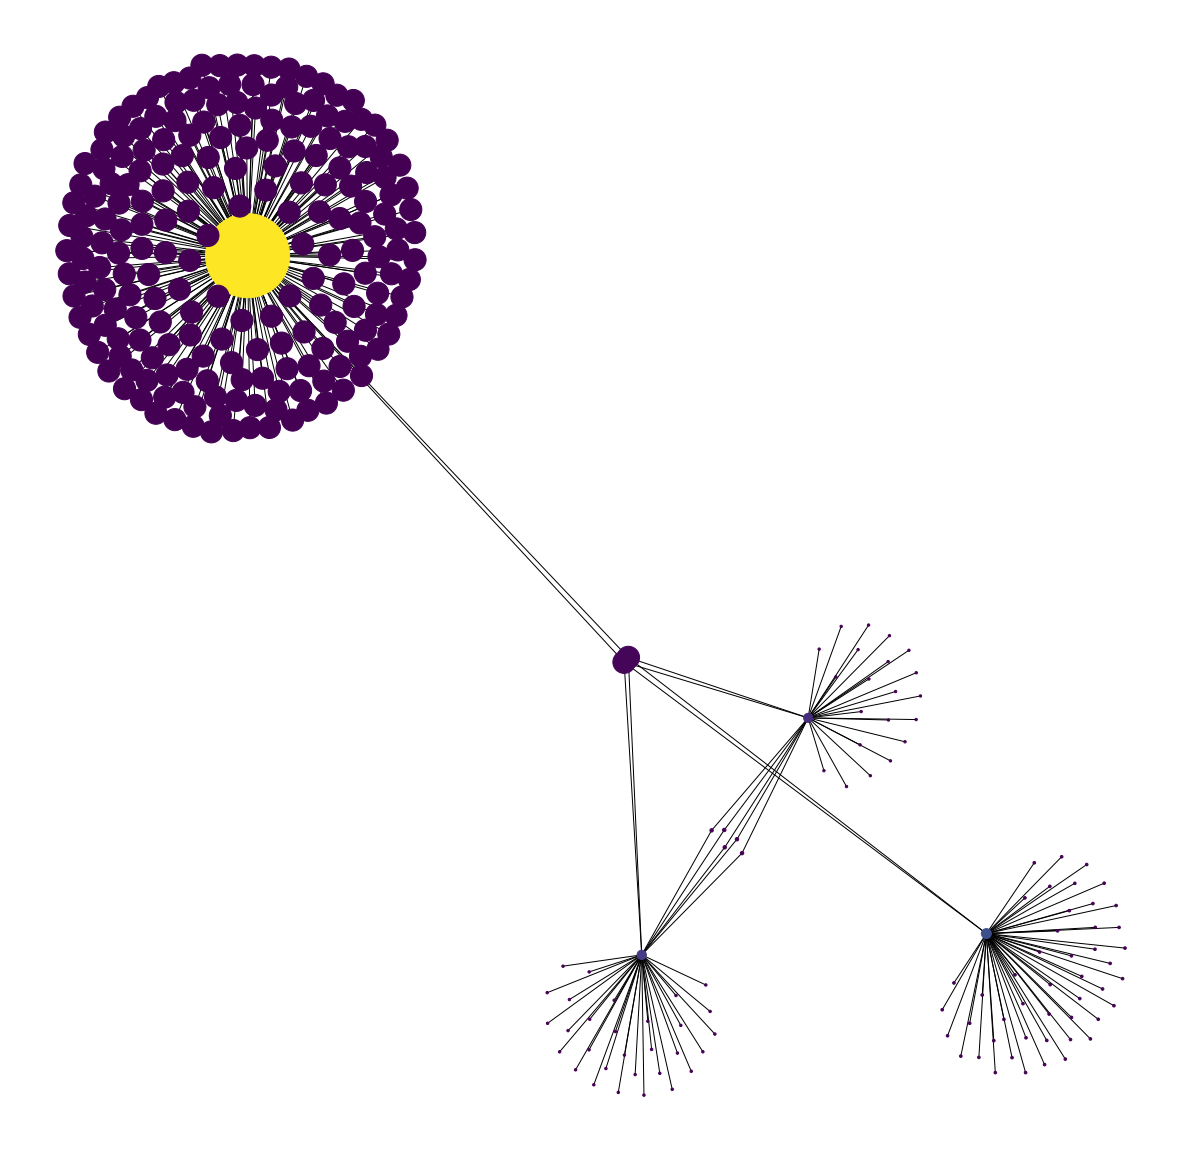

In [24]:
#Eigen Vector Centrality

eigCent = nx.eigenvector_centrality(relabeled_G)
node_color = [20000.0 * relabeled_G.degree(v) for v in relabeled_G]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(21,21))
nx.draw_networkx(relabeled_G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [25]:
#Increasing order of Eigenvector Centrality
sorted(eigCent, key=eigCent.get, reverse=True)[:5]

['Jorgen', 'VP', 'WhiteHouse', 'OC4Jorgensen', 'littlebit1193']

(-0.7197388947591276,
 1.0856263828217492,
 -0.5566391380688429,
 0.9906693049883675)

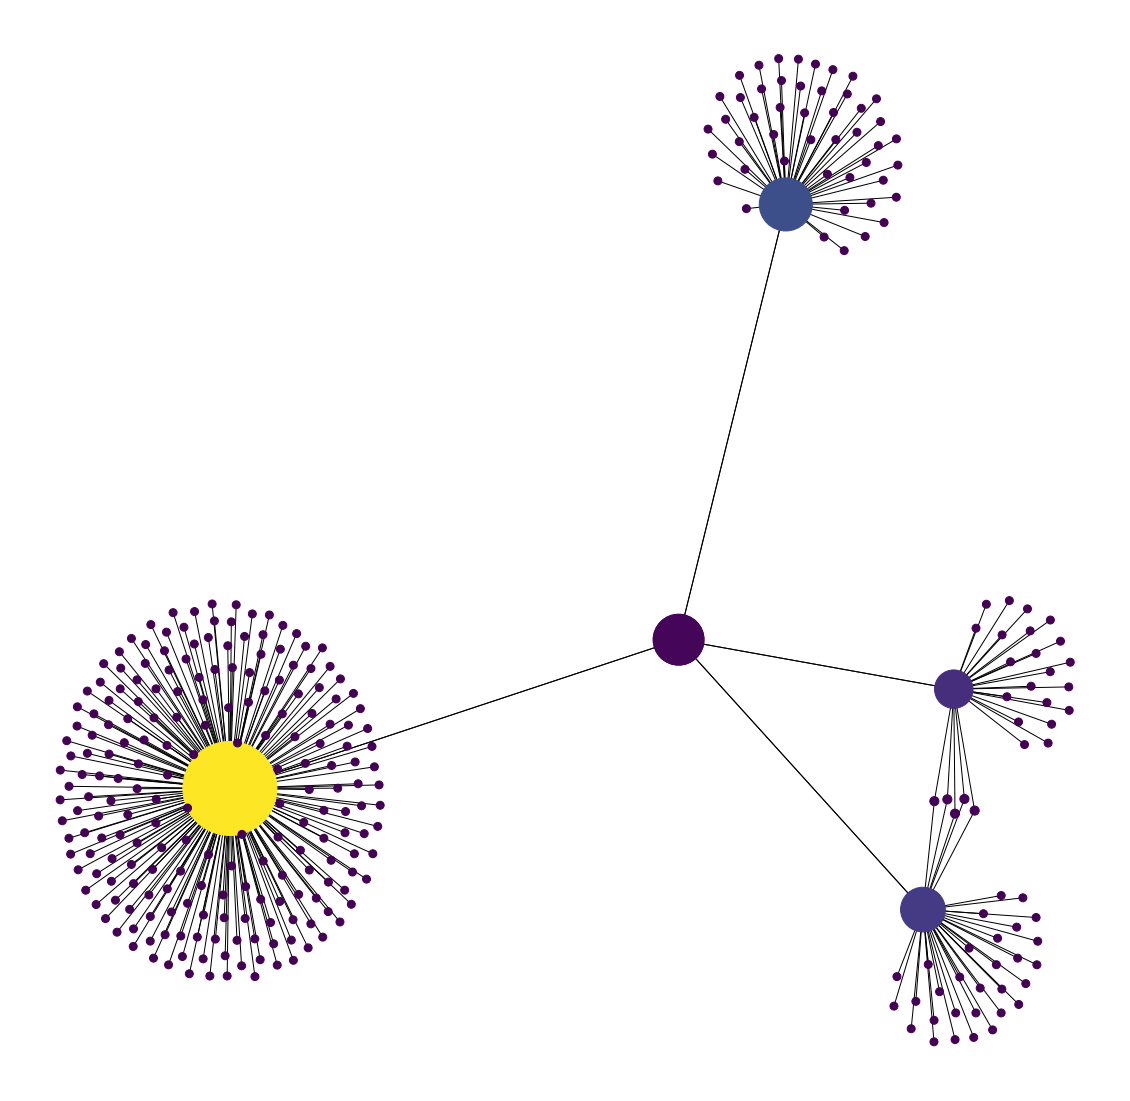

In [26]:
#Betweeness Centrality

pos = nx.spring_layout(relabeled_G)
betCent = nx.betweenness_centrality(relabeled_G, normalized=True, endpoints=True)
node_color = [20000.0 * relabeled_G.degree(v) for v in relabeled_G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(relabeled_G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')


In [27]:
#Increasing order of Betweeness Centrality
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Jorgen', 'Trump', 'VP', 'WhiteHouse', 'Clinton']